In [1]:
! pip install pandas matplotlib seaborn yfinance

## Loading the Libraries

In [2]:
from matplotlib import dates
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import yfinance as yf  # a library to fetch stock data from Yahoo Finance
import seaborn as sns
import datetime as dt
import warnings 

In [3]:
raw = yf.download("SPY AAPL", start="2010-01-01", end="2023-01-01")

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  2 of 2 completed


In [4]:
raw.columns

MultiIndex([( 'Close', 'AAPL'),
            ( 'Close',  'SPY'),
            (  'High', 'AAPL'),
            (  'High',  'SPY'),
            (   'Low', 'AAPL'),
            (   'Low',  'SPY'),
            (  'Open', 'AAPL'),
            (  'Open',  'SPY'),
            ('Volume', 'AAPL'),
            ('Volume',  'SPY')],
           names=['Price', 'Ticker'])

In [5]:
# Function to fetch and clean stock data
def get_stock_data():
    raw = yf.download("SPY AAPL", start="2010-01-01", end="2023-01-01")
    df = pd.DataFrame(raw.iloc[:, ::2])  # skip every second column
    df.columns = [col[0] for col in df.columns]  # Simplify column names
    return df

# Use the cleaned data outside the function
df = get_stock_data()
print(df.head())  # Example usage

[*********************100%***********************]  2 of 2 completed

               Close      High       Low      Open     Volume
Date                                                         
2010-01-04  6.440331  6.455077  6.391279  6.422877  493729600
2010-01-05  6.451465  6.487878  6.417459  6.458086  601904800
2010-01-06  6.348845  6.477044  6.342225  6.451465  552160000
2010-01-07  6.337110  6.379843  6.291067  6.372319  477131200
2010-01-08  6.379242  6.379844  6.291369  6.328685  447610800


## Line Plot 

<Axes: title={'center': 'Stock Prices'}, xlabel='Date'>

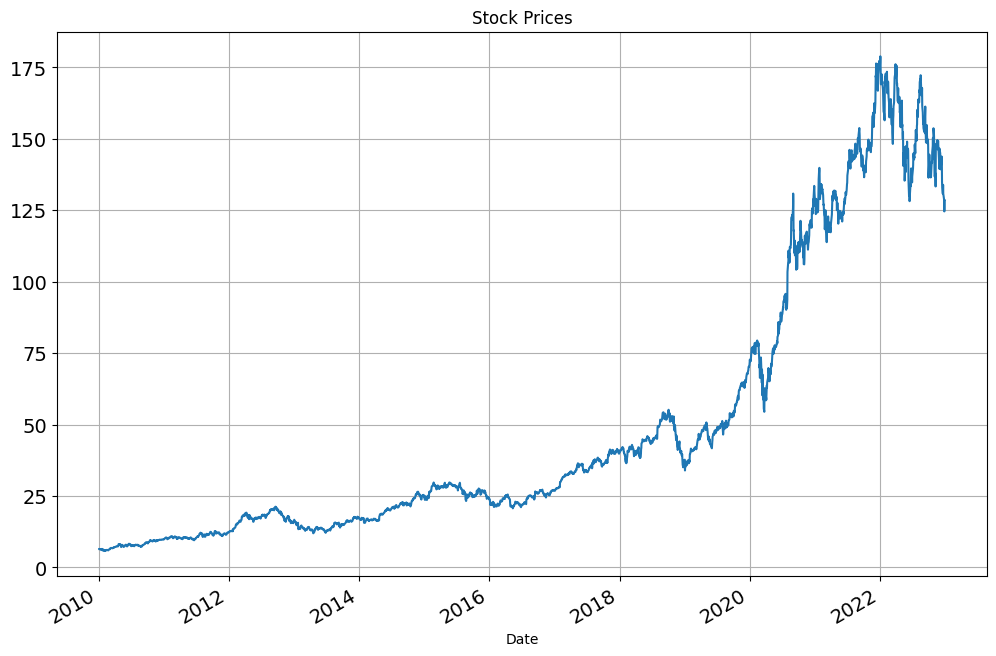

In [6]:
df.head()
df.Close.plot(figsize=(12, 8), title="Stock Prices", fontsize=14, grid=True)

<Axes: title={'center': 'Volume'}, xlabel='Date'>

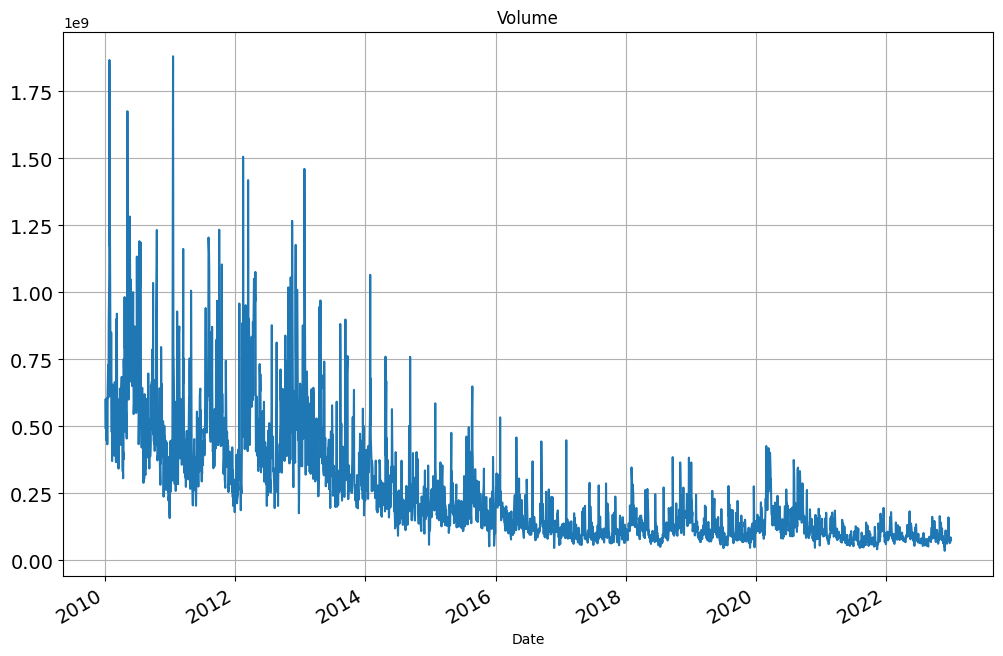

In [7]:
df.Volume.plot(figsize=(12, 8), title="Volume", fontsize=14, grid=True)

## Resampling

C:\Users\sankb\AppData\Local\Temp\ipykernel_22224\2147209198.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.resample('M').Close.mean().plot(figsize=(15, 8), title="Monthly Average Closing Prices", fontsize=14, grid=True)


<Axes: title={'center': 'Monthly Average Closing Prices'}, xlabel='Date'>

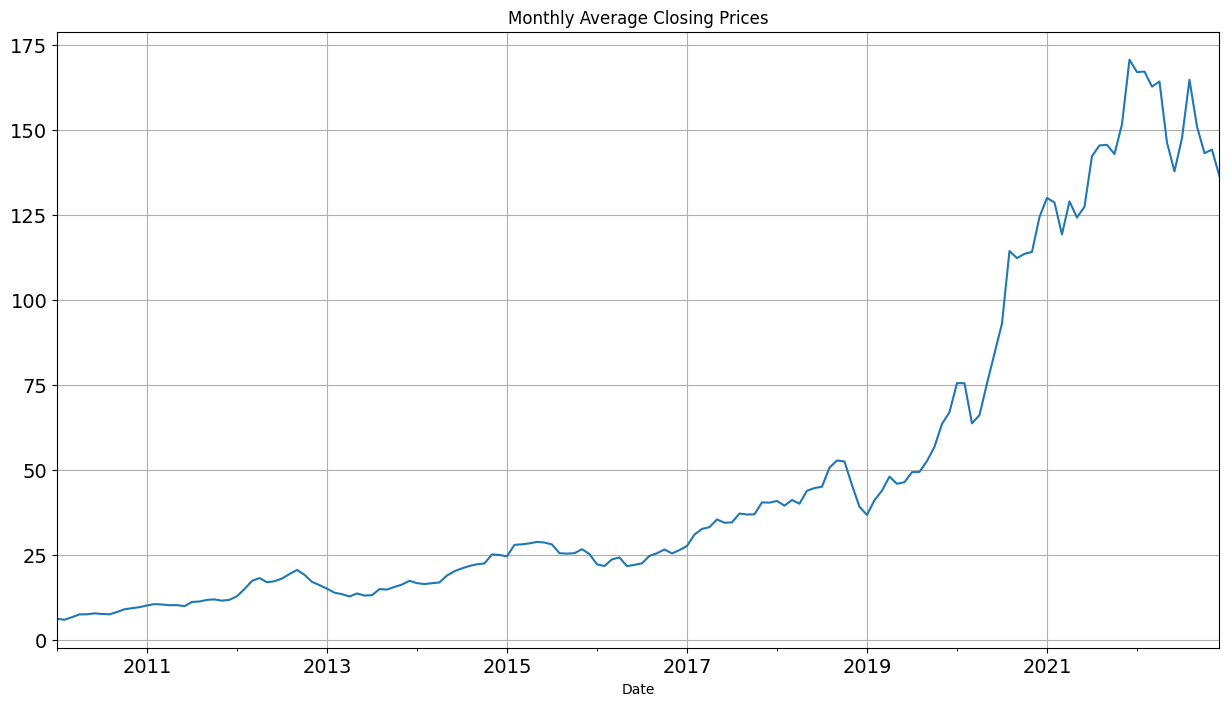

In [8]:
df.resample('M').Close.mean().plot(figsize=(15, 8), title="Monthly Average Closing Prices", fontsize=14, grid=True)

## Candlestick Plot 

Text(0.5, 0, 'Date')

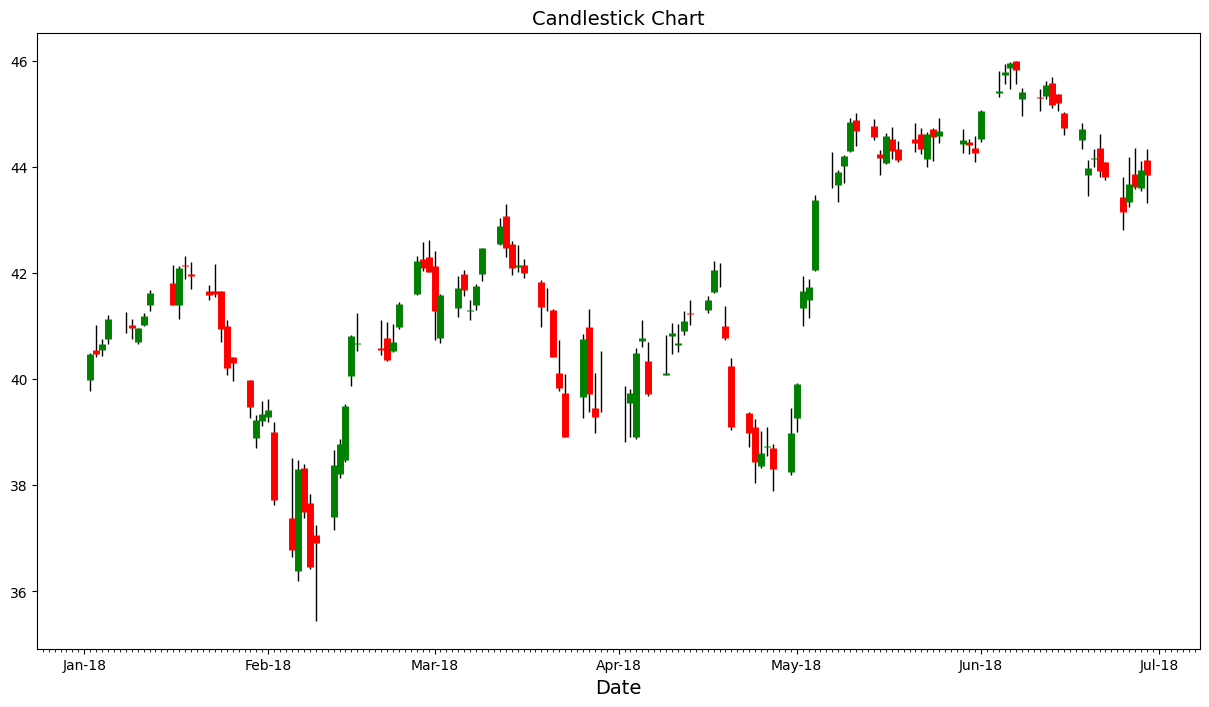

In [9]:
fig, ax = plt.subplots(figsize=(15, 8))

def plot_candle(df, ax):
    # Wick (high to low)
    ax.vlines(df.index, ymax=df.Low, ymin=df.High, color='black', linewidth=1)

    # Red candlesticks (price decrease)
    red = df.query('Close < Open')
    ax.vlines(red.index, ymax=red.Open, ymin=red.Close, color='red', linewidth=5)

    # Green candlesticks (price increase)
    green = df.query('Close > Open')
    ax.vlines(green.index, ymax=green.Close, ymin=green.Open, color='green', linewidth=5)

    # Adjust x-axis formatting
    ax.xaxis.set_major_locator(dates.MonthLocator(interval=1))  # Show every month
    ax.xaxis.set_major_formatter(dates.DateFormatter('%b-%y'))
    ax.xaxis.set_minor_locator(dates.DayLocator())

    return df

# Plot the candlestick chart

df.resample('d').agg({"Open": "first",
                      "Close": "last",
                     "High": "max",
                    "Low": "min"}).loc['Jan 2018': 'Jun 2018'].pipe(plot_candle, ax=ax)

plt.title("Candlestick Chart", fontsize=14)
plt.xlabel("Date", fontsize=14)


Text(0.5, 0, 'Date')

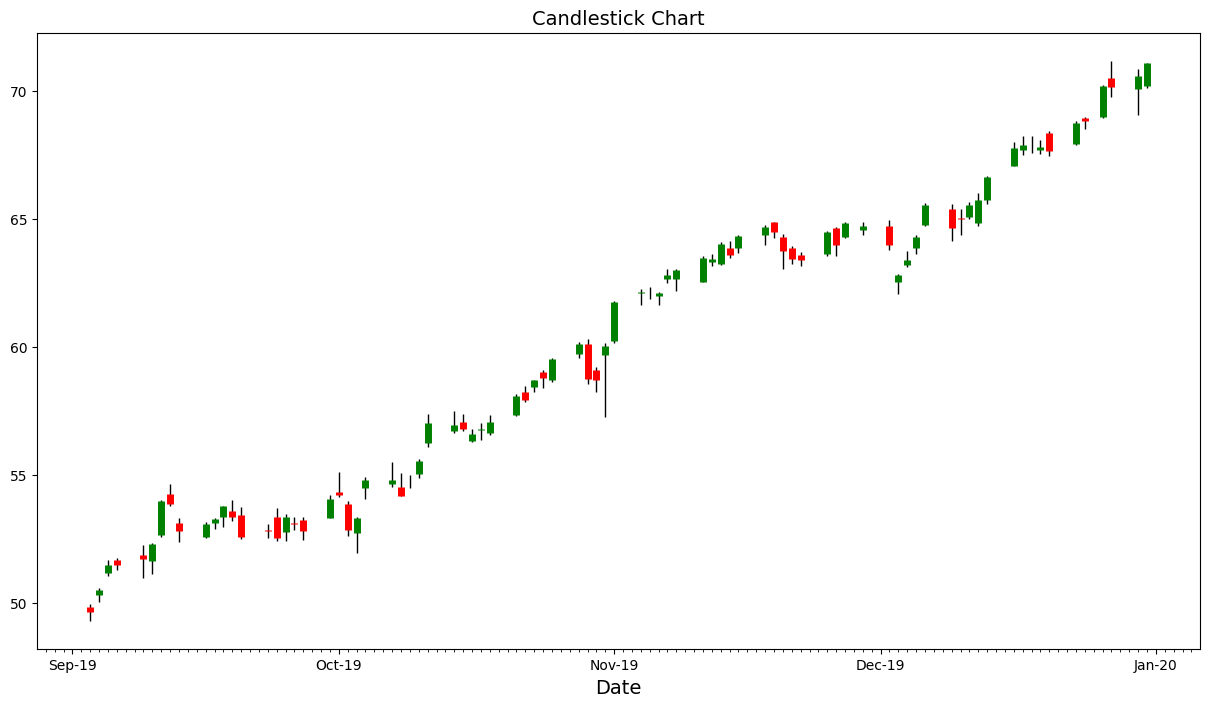

In [10]:
fig, ax = plt.subplots(figsize=(15, 8))

def plot_candle(df, ax):
    # Wick (high to low)
    ax.vlines(df.index, ymax=df.Low, ymin=df.High, color='black', linewidth=1)

    # Red candlesticks (price decrease)
    red = df.query('Close < Open')
    ax.vlines(red.index, ymax=red.Open, ymin=red.Close, color='red', linewidth=5)

    # Green candlesticks (price increase)
    green = df.query('Close > Open')
    ax.vlines(green.index, ymax=green.Close, ymin=green.Open, color='green', linewidth=5)

    # Adjust x-axis formatting
    ax.xaxis.set_major_locator(dates.MonthLocator(interval=1))  # Show every month
    ax.xaxis.set_major_formatter(dates.DateFormatter('%b-%y'))
    ax.xaxis.set_minor_locator(dates.DayLocator())

    return df

# Plot the candlestick chart


df.resample('d').agg({"Open": "first",
                      "Close": "last",
                     "High": "max",
                    "Low": "min"}).loc['Sep 2019': 'Dec 2019'].pipe(plot_candle, ax=ax)

plt.title("Candlestick Chart", fontsize=14)
plt.xlabel("Date", fontsize=14)

## Calutaing Returns on price 

In [13]:
df

,Close,High,Low,Open,Volume
Date,,,,,
2010-01-04,6.440331,6.455077,6.391279,6.422877,493729600
2010-01-05,6.451465,6.487878,6.417459,6.458086,601904800
2010-01-06,6.348845,6.477044,6.342225,6.451465,552160000
2010-01-07,6.337110,6.379843,6.291067,6.372319,477131200
2010-01-08,6.379242,6.379844,6.291369,6.328685,447610800
...,...,...,...,...,...
2022-12-23,130.344482,130.898044,128.149997,129.415284,63814900
2022-12-27,128.535538,129.899682,127.240596,129.870028,69007800
2022-12-28,124.591385,129.524031,124.423341,128.179661,85438400


In [14]:
df.pct_change()

,Close,High,Low,Open,Volume
Date,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN
2010-01-05,0.001729,5.081450e-03,0.004096,0.005482,0.219098
2010-01-06,-0.015906,-1.669899e-03,-0.011723,-0.001025,-0.082646
2010-01-07,-0.001849,-1.500704e-02,-0.008066,-0.012268,-0.135882
2010-01-08,0.006649,1.848218e-07,0.000048,-0.006848,-0.061871
...,...,...,...,...,...
2022-12-23,-0.002798,-1.590388e-02,-0.005065,-0.025531,-0.180306
2022-12-27,-0.013878,-7.627018e-03,-0.007096,0.003514,0.081374
2022-12-28,-0.030685,-2.891853e-03,-0.022141,-0.013016,0.238098
